<a href="https://colab.research.google.com/github/etmcrae/Project-4/blob/main/Emily_Spotify_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: CXI1TkotrmSLH5Ro/8ZKaINHDhymGtdgZrZ4+8PAHbo+tz03ohK+AgYV5vZ9jDEy6AphGWkGo+Q=
x-amz-request-id: TBCCJ1D448DT31S1
Date: Fri, 25 Apr 2025 17:28:42 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [ ]:
!curl -s -O {url}

In [ ]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Apr 25 17:28 ./
drwxr-xr-x 1 root root   4096 Apr 25 17:27 ../
drwxr-xr-x 4 root root   4096 Apr 24 18:19 .config/
drwxr-xr-x 1 root root   4096 Apr 24 18:20 sample_data/
-rw-r--r-- 1 root root 738124 Apr 25 17:28 Spotify.csv


In [ ]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
df = pd.read_csv('Spotify.csv')
print(df.head())


   Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name     Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   

           Artist Artist Followers                 Song ID  \
0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          2

In [ ]:
df_sorted = df.sort_values('Valence', ascending=False)
df_sorted


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
884,885,148,1,2020-09-18--2020-09-25,September,"5,329,256","Earth, Wind & Fire",3008916,2grjqo0Frpf2okIBiifQKs,"['disco', 'funk', 'jazz funk', 'motown', 'quie...",...,0.697,0.832,-7.264,0.0298,0.168,0.269,125.926,215093,0.979,A
1408,1409,85,1,2020-02-14--2020-02-21,Running Over (feat. Lil Dicky),"7,493,188",Justin Bieber,48544923,75nKBP8jQu681pTNCtrEnn,"['canadian pop', 'pop', 'post-teen pop']",...,0.774,0.603,-7.319,0.0591,0.438,0.0869,149.982,179627,0.977,B
677,678,149,1,2020-12-18--2020-12-25,Little Saint Nick - 1991 Remix,"7,301,381",The Beach Boys,1251372,63Lk6VuXdj7S58R3wLdv9r,[],...,0.602,0.553,-9.336,0.0328,0.108,0.0512,130.594,118840,0.971,B
1096,1097,129,4,2020-06-05--2020-06-12,Na Raba Toma Tapão,"4,396,629",Niack,352402,0AGS6ZRgzobrazmCi6pYMe,['funk carioca'],...,0.962,0.787,1.509,0.0554,0.666,0.176,130.003,165231,0.968,D#/Eb
1230,1231,102,1,2020-04-17--2020-04-24,JUMP (feat. YoungBoy Never Broke Again),"6,033,348",DaBaby,7601122,0oT9ElXYSxvnOOagP9efDq,"['north carolina hip hop', 'rap']",...,0.896,0.72,-6.262,0.355,0.169,0.252,140.1,212093,0.966,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,655,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,"10,509,961",Queen,,,,...,,,,,,,,,,
784,785,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...","4,739,241","Super Yei, Jone Quest",,,,...,,,,,,,,,,
530,531,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...","6,162,453",Ariana Grande,,,,...,,,,,,,,,,
876,877,164,4,2020-09-18--2020-09-25,+Linda,"4,964,708",Dalex,,,,...,,,,,,,,,,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


**Start of cleaning table for a Single Decision Tree**

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop(['Index', 'Week of Highest Charting', 'Song ID', 'Release Date', 'Streams', 'Number of Times Charted', 'Weeks Charted', 'Song Name', 'Highest Charting Position'], axis = 1, inplace = True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist            1556 non-null   object
 1   Artist Followers  1556 non-null   object
 2   Genre             1556 non-null   object
 3   Popularity        1556 non-null   object
 4   Danceability      1556 non-null   object
 5   Energy            1556 non-null   object
 6   Loudness          1556 non-null   object
 7   Speechiness       1556 non-null   object
 8   Acousticness      1556 non-null   object
 9   Liveness          1556 non-null   object
 10  Tempo             1556 non-null   object
 11  Duration (ms)     1556 non-null   object
 12  Valence           1556 non-null   object
 13  Chord             1556 non-null   object
dtypes: object(14)
memory usage: 170.3+ KB


In [ ]:
# Convert 'speechiness' column to numeric, coercing errors to NaN
df_copy['Speechiness'] = pd.to_numeric(df_copy['Speechiness'], errors='coerce')
df_copy['Acousticness'] = pd.to_numeric(df_copy['Acousticness'], errors='coerce')
df_copy['Liveness'] = pd.to_numeric(df_copy['Liveness'], errors='coerce')
df_copy['Tempo'] = pd.to_numeric(df_copy['Tempo'], errors='coerce')
df_copy['Duration (ms)'] = pd.to_numeric(df_copy['Duration (ms)'], errors='coerce')
df_copy['Valence'] = pd.to_numeric(df_copy['Valence'], errors='coerce')
df_copy['Popularity'] = pd.to_numeric(df_copy['Popularity'], errors='coerce')
df_copy['Danceability'] = pd.to_numeric(df_copy['Danceability'], errors='coerce')
df_copy['Energy'] = pd.to_numeric(df_copy['Energy'], errors='coerce')
df_copy['Loudness'] = pd.to_numeric(df_copy['Loudness'], errors='coerce')
df_copy['Artist Followers'] = pd.to_numeric(df_copy['Artist Followers'], errors='coerce')

# Fill NaN values with 0 - of which there were 11 in each of those below.
df_copy['Artist Followers'] = df_copy['Artist Followers'].fillna(0)
df_copy['Popularity'] = df_copy['Popularity'].fillna(0)
df_copy['Danceability'] = df_copy['Danceability'].fillna(0)
df_copy['Energy'] = df_copy['Energy'].fillna(0)
df_copy['Loudness'] = df_copy['Loudness'].fillna(0)
df_copy['Acousticness'] = df_copy['Acousticness'].fillna(0)
df_copy['Liveness'] = df_copy['Liveness'].fillna(0)
df_copy['Tempo'] = df_copy['Tempo'].fillna(0)
df_copy['Duration (ms)'] = df_copy['Duration (ms)'].fillna(0)
df_copy['Valence'] = df_copy['Valence'].fillna(0)
df_copy['Speechiness'] = df_copy['Speechiness'].fillna(0)

print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            1556 non-null   object 
 1   Artist Followers  1556 non-null   float64
 2   Genre             1556 non-null   object 
 3   Popularity        1556 non-null   float64
 4   Danceability      1556 non-null   float64
 5   Energy            1556 non-null   float64
 6   Loudness          1556 non-null   float64
 7   Speechiness       1556 non-null   float64
 8   Acousticness      1556 non-null   float64
 9   Liveness          1556 non-null   float64
 10  Tempo             1556 non-null   float64
 11  Duration (ms)     1556 non-null   float64
 12  Valence           1556 non-null   float64
 13  Chord             1556 non-null   object 
dtypes: float64(11), object(3)
memory usage: 170.3+ KB
None


In [ ]:
df_copy.head()

,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,The Kid LAROI,2230022.0,['australian hip hop'],99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,Olivia Rodrigo,6266514.0,['pop'],99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,Ed Sheeran,83293380.0,"['pop', 'uk pop']",98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [ ]:
df_copy.describe()

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1.556000e+03,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,1.461286e+07,69.593830,0.685119,0.629017,-6.303594,0.122782,0.246936,0.179921,121.942822,196541.492288,0.511065
std,1.666242e+07,16.826585,0.153267,0.169533,2.556372,0.110479,0.250308,0.144362,31.231031,49824.675446,0.230591
min,0.000000e+00,0.000000,0.000000,0.000000,-25.166000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.990790e+06,65.000000,0.597000,0.528000,-7.481500,0.045125,0.047125,0.095575,97.019500,168728.500000,0.340000
50%,6.852509e+06,73.000000,0.703500,0.641000,-5.955000,0.074950,0.158500,0.123500,121.955000,193303.500000,0.510500
75%,2.253630e+07,80.000000,0.795000,0.750000,-4.668000,0.164000,0.386000,0.215250,143.177750,218766.000000,0.690000
max,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


In [ ]:
df_copy.isnull().sum()

,0
Artist,0
Artist Followers,0
Genre,0
Popularity,0
Danceability,0
Energy,0
Loudness,0
Speechiness,0
Acousticness,0
Liveness,0


In [ ]:
# Create mappings for unique values in 'Artist', 'Chord', and 'Genre' columns
artist_mapping = {artist: i for i, artist in enumerate(df_copy['Artist'].unique())}
chord_mapping = {chord: i for i, chord in enumerate(df_copy['Chord'].unique())}
genre_mapping = {genre: i for i, genre in enumerate(df_copy['Genre'].unique())}

# Create new columns with unique float IDs
df_copy['Artist_ID'] = df_copy['Artist'].map(artist_mapping).astype(float)
df_copy['Chord_ID'] = df_copy['Chord'].map(chord_mapping).astype(float)
df_copy['Genre_ID'] = df_copy['Genre'].map(genre_mapping).astype(float)

# Display the updated DataFrame
print(df_copy.head())


           Artist  Artist Followers                                   Genre  \
0        Måneskin         3377762.0  ['indie rock italiano', 'italian pop']   
1   The Kid LAROI         2230022.0                  ['australian hip hop']   
2  Olivia Rodrigo         6266514.0                                 ['pop']   
3      Ed Sheeran        83293380.0                       ['pop', 'uk pop']   
4       Lil Nas X         5473565.0           ['lgbtq+ hip hop', 'pop rap']   

   Popularity  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       100.0         0.714   0.800    -4.808       0.0504        0.1270   
1        99.0         0.591   0.764    -5.484       0.0483        0.0383   
2        99.0         0.563   0.664    -5.044       0.1540        0.3350   
3        98.0         0.808   0.897    -3.712       0.0348        0.0469   
4        96.0         0.736   0.704    -7.409       0.0615        0.0203   

   Liveness    Tempo  Duration (ms)  Valence  Chord  Artist_ID  Chor

**Now making a copy to use in the decision tree whereby I will delete the text columns. **

In [ ]:
tree_copy = df_copy.copy() #use this df when you want to run WITH the chord, genre, and artist IDs

In [ ]:
tree_copy.drop(['Artist', 'Chord', 'Genre'], axis = 1, inplace = True)

In [ ]:
X =tree_copy.drop('Popularity', axis = 1)
y = tree_copy['Popularity']

In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )


In [ ]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,15.890083,1.257427
1,2,15.530407,1.252456
2,3,12.910100,2.825028
3,4,11.339321,2.407948
4,5,10.658610,2.004127
5,6,10.509701,1.572607
6,7,10.809308,1.572451
7,8,10.957664,1.519656
8,9,11.116206,1.480643
9,10,11.354165,1.420557


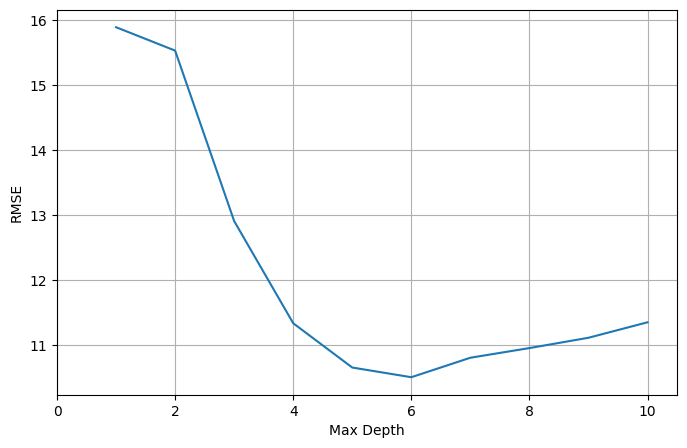

In [ ]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=5)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)*1000}") #DIVIDE BY 1000?? WHY IS THIS EVEN HERE??

CV RMSE: 10560.0


**Trying a second time without any artist, genre, or chord info**

In [ ]:
tree_copy2 = tree_copy.copy() #use this df when you want to run WITHOUT the chord, genre, and artist IDs

In [ ]:
tree_copy2.drop(['Artist_ID', 'Chord_ID', 'Genre_ID'], axis = 1, inplace = True)

In [ ]:
X =tree_copy2.drop('Popularity', axis = 1)
y = tree_copy2['Popularity']

In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )


In [ ]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,15.874474,1.214305
1,2,15.324950,1.046217
2,3,11.256457,1.245220
3,4,10.985533,0.907551
4,5,11.216461,0.980998
5,6,11.424968,0.960152
6,7,11.685971,0.986527
7,8,11.908331,0.896520
8,9,12.268403,1.014548
9,10,12.426187,0.962876


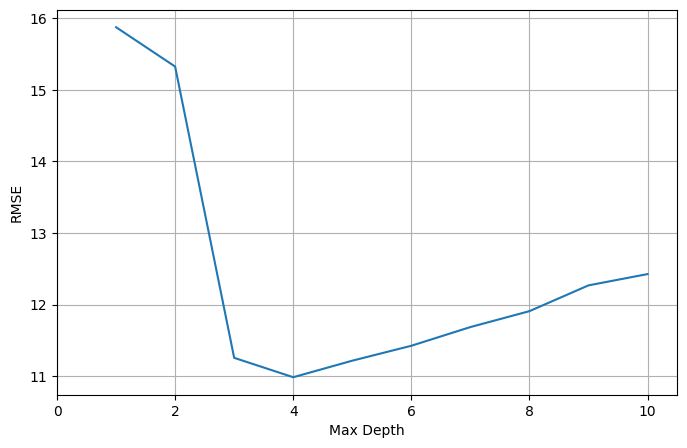

In [ ]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=4)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")

CV RMSE: 11090.0


**Now visualizing the tree**

In [ ]:
import graphviz
from IPython.display import display
from sklearn import tree

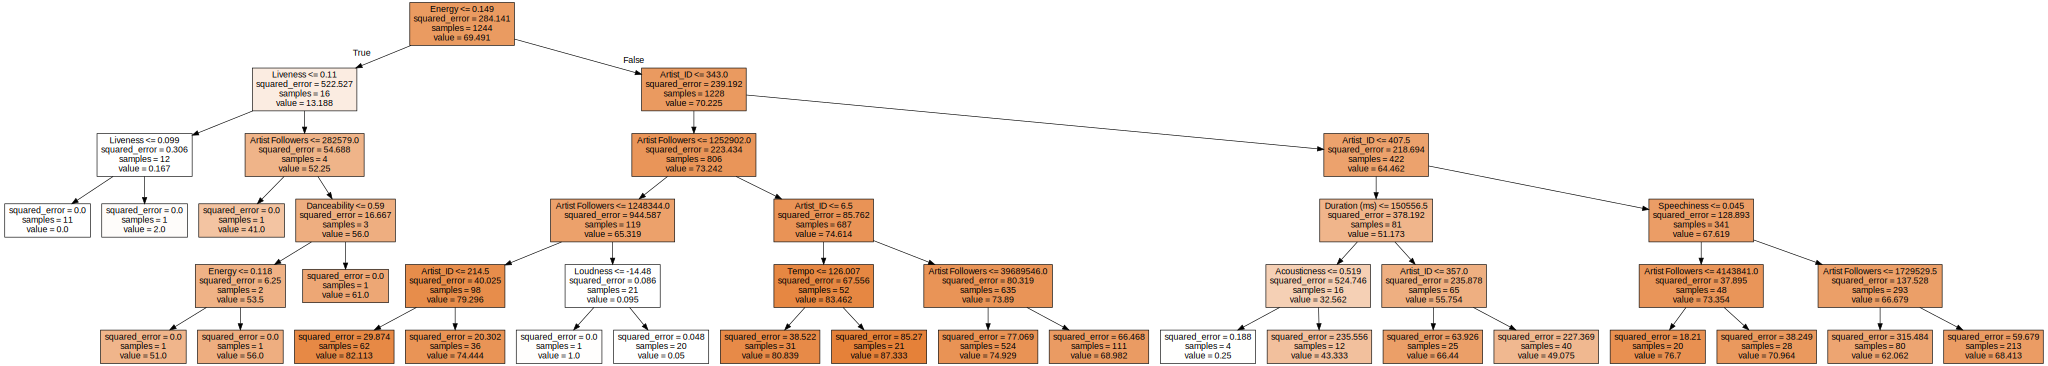

'decision_tree.png'

In [ ]:
# Option 1
dot_data = tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
display(
  graphviz.Source(dot_data)
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png") # Saves as decision_tree.png

**Starting Random Forest - With the Genre, Chord, and Artist dropped**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [ ]:
numLoops = 500

mean_error = np.zeros(numLoops)

np.random.seed(25)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=5, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')

RMSE: 10747.232066092942
RMSE_std: 1955.8195168571508


In [ ]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(25)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')
np.sqrt(mean_error)[:50]


RMSE: 11203.396720425959
RMSE_std: 766.5156019826273


array([11.82378768, 11.07501953, 12.42179768, 10.42187511, 11.79457176,
       13.2055025 , 12.42375565, 12.52316474, 10.09446726, 11.39065772,
        9.76643677, 10.98342136, 10.85057307, 11.01555136, 12.12393488,
       11.55097815, 10.91385264, 11.7686554 , 11.36416996, 11.0185028 ,
       10.88732797, 10.81103985, 11.28967146, 10.80386475, 10.82009497,
       11.51611468, 11.85599221, 10.96353952, 10.70060357, 11.51134164,
       11.71726756, 10.8267276 , 10.85357084, 10.41310811, 10.77216707,
       10.5092218 , 11.68949095, 10.88733397, 11.23441798, 10.91794489,
       10.94183046, 10.82832527, 10.81047094, 12.72609876,  9.80353808,
       11.18808317, 11.87788022, 11.16351946, 12.29014484, 11.40866602])

In [ ]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(25)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()


10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [ ]:
pickle.dump(rfModel, open('rfModel.p','wb'))


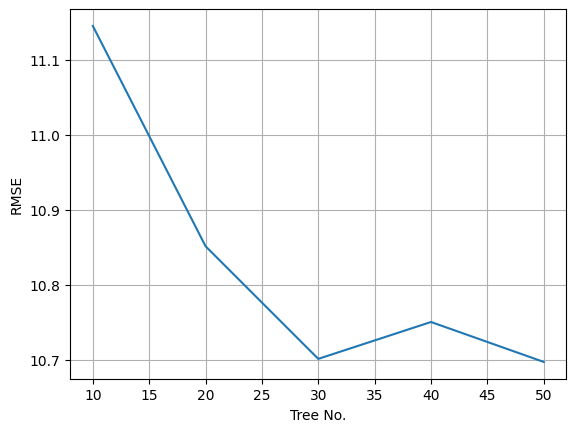

In [ ]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()


In [ ]:
print(f'RMSE with 30 trees: {rmse_results[2]*1000}')


RMSE with 30 trees: 10701.302323446971


In [ ]:
import graphviz
from IPython.display import display
from sklearn import tree


In [ ]:
len(rfModel.estimators_)


50

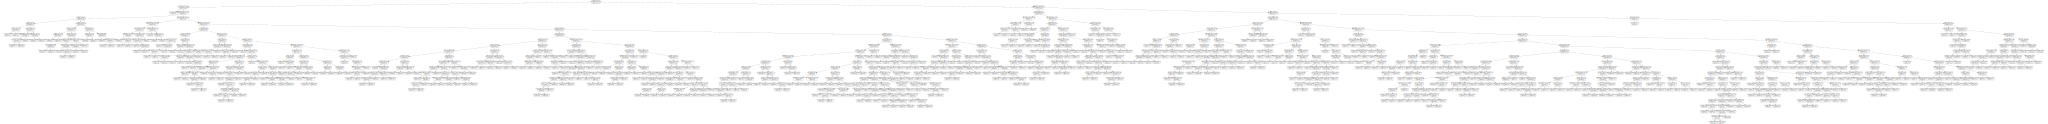

In [ ]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)


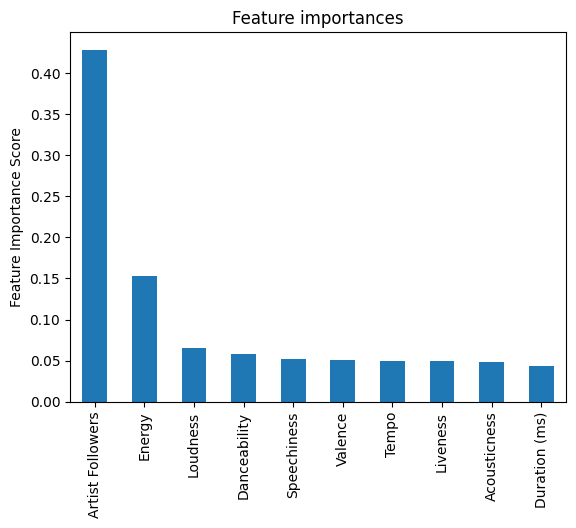

In [ ]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;


In [ ]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()


,0
Artist Followers,42.847658
Energy,58.189796
Loudness,64.718614
Danceability,70.572203
Speechiness,75.747976
Valence,80.774168
Tempo,85.778965
Liveness,90.767107
Acousticness,95.602799
Duration (ms),100.000000


**Start XG Boost**

In [ ]:
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()*1000}')


RMSE: 11677.56809368172


In [ ]:
y_pred_xgb[0]

np.float32(67.9749)

In [ ]:
y_test.to_numpy()[0]

np.float64(79.0)

In [ ]:
pop = X_test[:3]
pop


,Artist Followers,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
800,83337783.0,0.640,0.648,-8.113,0.1870,0.12400,0.0802,92.977,197867.0,0.548
398,42227614.0,0.660,0.817,-6.269,0.0521,0.16200,0.0667,135.942,277592.0,0.714
1124,11821805.0,0.732,0.750,-6.366,0.2310,0.00264,0.1090,155.096,182707.0,0.401


In [ ]:
xgbr.predict(pop)


array([67.9749 , 71.99759, 67.71068], dtype=float32)

In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)


{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 40}


In [ ]:
params = model.best_params_

numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      **params,
      # learning_rate = 0.1,
      # max_depth = 3,
      # n_estimators = 40,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()*1000}')


RMSE: 11129.07311651597


<ipython-input-167-4ab0d2b4859b>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


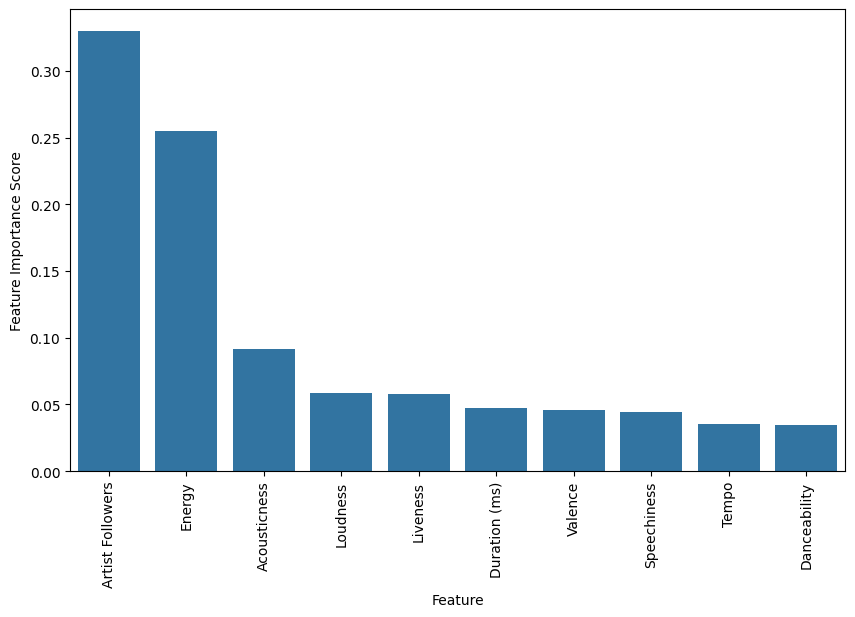

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns).sort_values( ascending = False )
plt.figure(figsize = (10,6))
ax = sns.barplot(x = feat_imp.index, y = feat_imp.values )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;
